<a href="https://colab.research.google.com/github/adarshsoni10/Data-Analysis-on-Hotel-Bookings/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [9]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [10]:
#Mounting Google Drive for File Access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
#Setting up the Folder Path where the file is kept
folder_path='/content/drive/MyDrive/Colab Notebooks/EDA Hotel Booking/'
df=pd.read_csv(folder_path+'Hotel Bookings.csv')

In [23]:
#Getting the shape of the DataFrame
df.shape

(119390, 32)

In [24]:
#Checking info about each columns of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [25]:
#Getting Columns list to understand the Data in DataFrame
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [19]:
#Printing Sample Head data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [20]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [26]:
#Description about all the matematical data in DataFrame
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [27]:
#checking null values in each of the columns
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<h2>**Creating a heat map for null values in Hotel dataset, to check for Null Values in DF**</h2>


In [29]:
# setting configuration for our plots
plt.rcParams['figure.figsize'] = (10, 5)

Text(86.0, 0.5, 'NullValues in yellow shadow.')

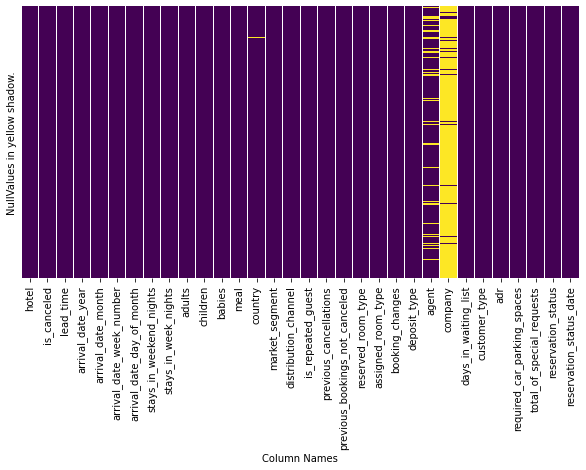

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.xlabel('Column Names')
plt.ylabel('NullValues in yellow shadow.')

<h3>*Here, we can see that company column has too many null values, so we will drop it.*</h3>

In [35]:
#Dropping the Company column from the DataFrame
df.drop('company', axis=1, inplace=True)

<h3>As we can see in above heatmap 'agent' and 'country' columns also have a few null values, so we are replacing Nan values in 'agent' column by median value and in 'country by mode value'.

In [36]:
#Declaring function to replace null values with median value
def impute_median(series):
    return series.fillna(series.median())

In [38]:
df['agent'] = df['agent'].transform(impute_median)
df['country'].fillna(str(df['country'].mode().values[0]), inplace=True)

<h3>**Creating a heatmap again with modified Dataframe**</h3>

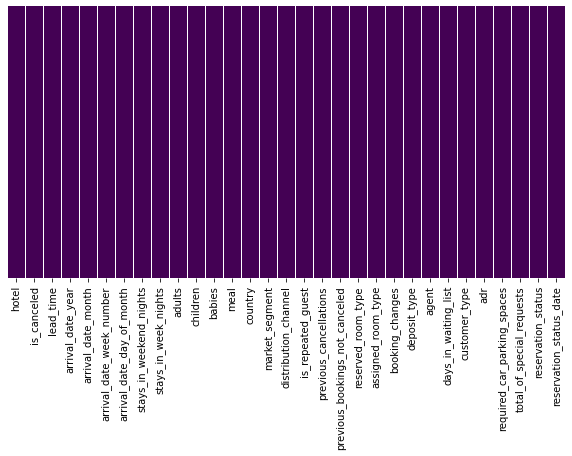

In [39]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<h3>*Here we can see null values are handled so we have non null data frame now, to work on further insights*

In [40]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<h3>*Now, We want to know the type of hotels in our data set, we will use unique method for that.*

In [41]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

<h3>Now plotting the Graph for yearly bookings in each of the type.

Text(0, 0.5, 'Total No of bookings')

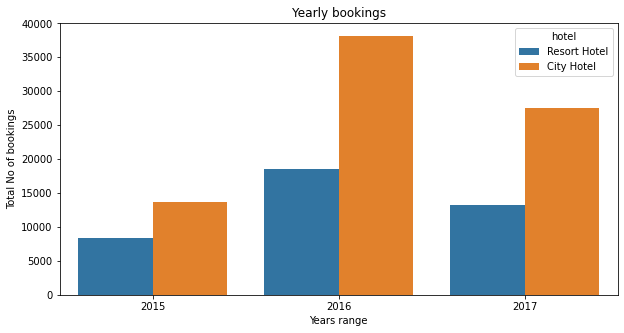

In [42]:
sns.countplot (x= 'arrival_date_year', data= df, hue= 'hotel').set_title ('Yearly bookings')
plt.xlabel('Years range')
plt.ylabel('Total No of bookings')

<h3>It seems like City hotels have more bookings than Resort hotels, let's confirm with the help of a pie chart.

([<matplotlib.patches.Wedge at 0x7efe0340b0d0>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(0.9564161333812984, 0.5433858480011848, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.52168152729889, 0.29639228072791896, '33.6%')])

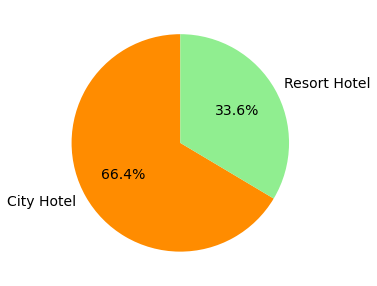

In [43]:
#assigning labels and converting them to list
labels = df['hotel'].value_counts().index.tolist()

# assigning value counts and converting it to list
sizes = df['hotel'].value_counts().tolist()

#creating pie chart using above
plt.pie(sizes,labels=labels,colors=['darkorange','lightgreen'],autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

Eventually, it might be pretty intuitive to guess that City hotels receive more bookings than Resort hotels. Because most of the times people go to Resort Hotels only in vacations or planned enagagements. While City hotels are booked for all other purposes, be it work, small events or more.

Also, the accessibility to city hotels is usually more convenient than Resort Hotels.

In [44]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


<h3>*Now, Let's find out which is the busiest month during the year in both hotels.*

Text(0, 0.5, 'Bookings count')

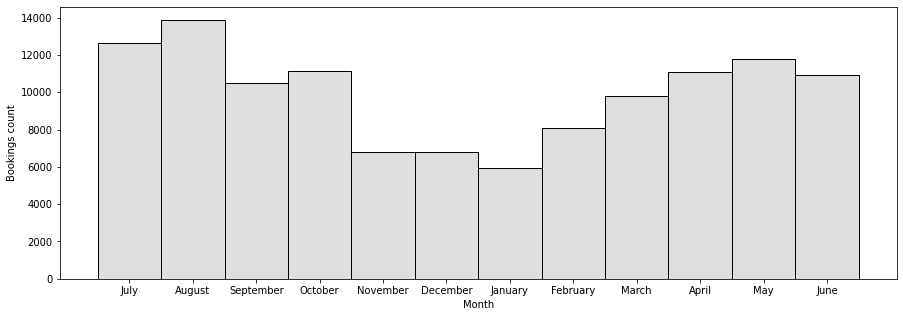

In [46]:
plt.figure(figsize=(15,5))
#
sns.histplot(data = df[['hotel', 'arrival_date_month']], x='arrival_date_month', color='lightgrey')
plt.xlabel('Month')
plt.ylabel('Bookings count')

<h3>*In the above chart total no of Bookings during each month is shown for both City and Resort hotels. Further if we want to to check this individually for each hotel type, that would give more precise results.*

Text(0, 0.5, 'Bookings Count')

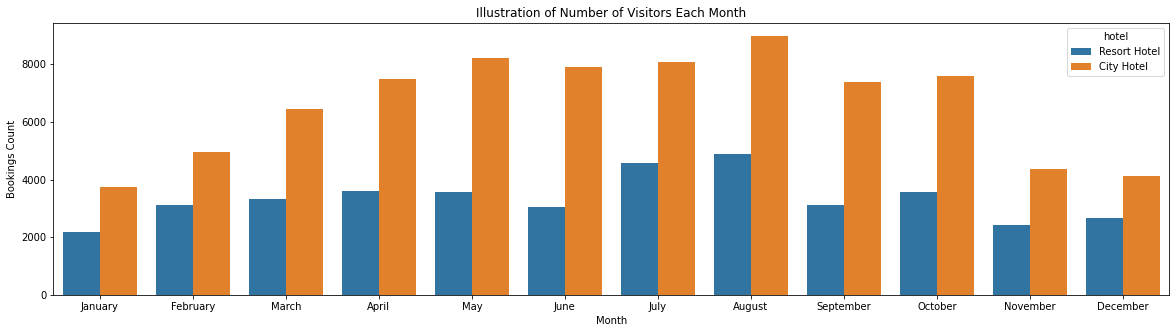

In [47]:
plt.figure(figsize=(20,5))

sns.countplot(data = df[['hotel', 'arrival_date_month']], x='arrival_date_month',hue='hotel', order=["January","February","March","April","May",
"June","July","August","September","October","November","December"]).set_title('Illustration of Number of Visitors Each Month')
plt.xlabel('Month')
plt.ylabel('Bookings Count')

<h3>*Here, it can be easily concluded that August is the most busy month for both type of hotels*

<h3>*Visualizing monthly bookings and monthly cancellations*

In [48]:
# taking different values of months count into account.
df_copy= df.copy()
df_copy['no_of_bookings']= 1
df_copy.loc[(df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy.loc[~((df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,no_of_bookings
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.333333
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.333333
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.333333
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.333333
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.333333
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.333333
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,14.0,0,Transient,107.0,0,0,Check-Out,2015-07-03,0.333333
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,0.333333
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,0.333333
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,0.333333


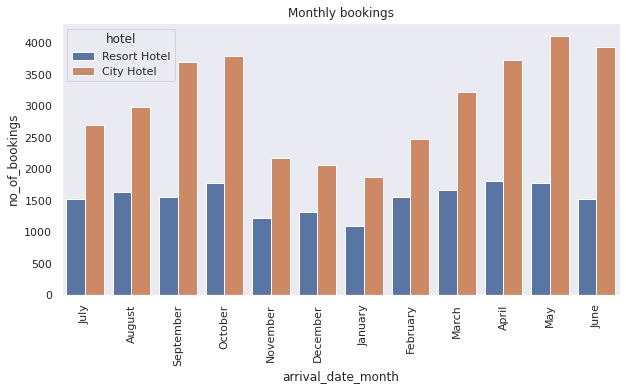

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

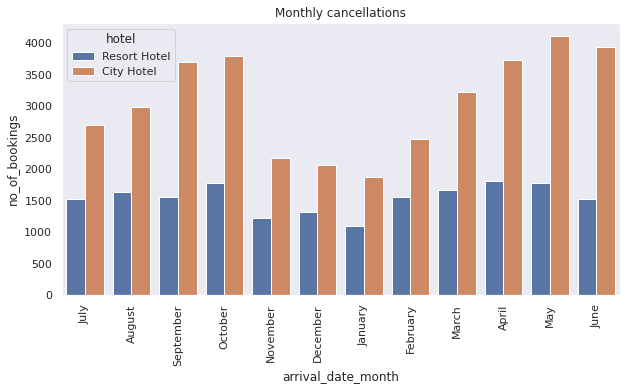

In [53]:

#Plotting Bookings chart

month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
plt.title("Monthly bookings")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy['hotel'], estimator= sum, data= df_copy)
plt.xticks(rotation = 90)
plt.show()
#plotting cancellation chart

df_copy1= df.copy()
df_copy1['no_of_bookings']= 1
df_copy1.loc[(df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy1.loc[~((df_copy1.arrival_date_month== 'July')| (df_copy1.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy1.sample(100)
b= df_copy1[df_copy1.is_canceled == 1]
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.set(style="dark")
plt.title("Monthly cancellations")
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy1['hotel'], estimator= sum, data= df_copy1)
plt.xticks(rotation = 90)

Conclusion: In case of city hotel, months with most numbers of bookings (ie.in May, June, September, October) also witnessed more cancellations. Guest numbers for the Resort hotel went down slighty from June to September though variations in bookings and cancellations are less. Both hotels have very few guests during winter season.

<h3>*Have you ever wondered when the best time of year to book a hotel room is?*

**We would like to approach this question by setting parameters on which a customer usually decides that a particular month might be the best time to book a hotel room.

So, If I am a one of those customers who loves travelling, but travelling parameters are vacations and weather. Here accessbility is the key, i have to be sure to check for the availablity for the partiualrs else I have to wait before my request gets accepted, also have to find the average price for prime seasons.**

In [54]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

***Let's keep all those variables which we need in a new dataframe***

In [55]:
# dropping babies column as they are not accounted into monetary consideration
new_df= df[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']]


new_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,0,A,A,No Deposit,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,0,E,E,No Deposit,Transient,225.43,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,0,D,D,No Deposit,Transient,157.71,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,0,A,A,No Deposit,Transient,104.40,0,0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,0,0,0,A,A,No Deposit,Transient,151.20,0,2


In [ ]:
#Creating a column for total guests
new_df['Total_Guests'] = new_df['adults'] + new_df['children']
new_df= new_df[new_df.Total_Guests > 0]

**What about price variations over a period of an year.Lets find out.**

In [57]:
new_df['adr_pp']= new_df.adr/new_df.Total_Guests
monthlyadr_df= new_df.groupby (['hotel','arrival_date_month'])['adr_pp'].mean()
monthlyadr_df=pd.DataFrame({"hotel":(map(lambda x:x[0],monthlyadr_df.index)), "month": list(map(lambda x:x[1],monthlyadr_df.index)), "mean": monthlyadr_df.values})
monthlyadr_df

,hotel,month,mean
0,City Hotel,April,58.714542
1,City Hotel,August,55.319402
2,City Hotel,December,48.578168
3,City Hotel,February,49.172672
4,City Hotel,January,50.800087
5,City Hotel,July,54.834401
6,City Hotel,June,67.899081
7,City Hotel,March,52.362169
8,City Hotel,May,71.068304
9,City Hotel,November,56.982024


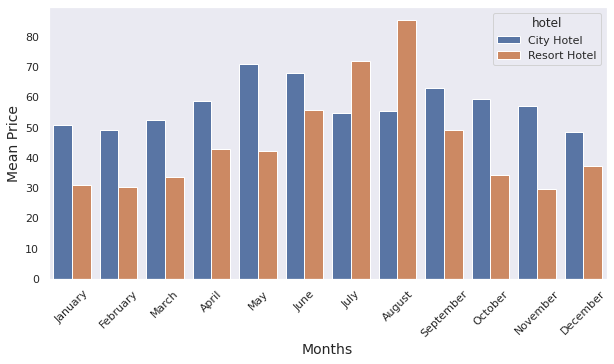

In [58]:
#Now lets plot the graph for above
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']
sns.barplot (y= 'mean', x= 'month', data= monthlyadr_df, hue= 'hotel', order= month_sorted)
plt.xticks(rotation = 45)
plt.ylabel('Mean Price', size=14)
plt.xlabel('Months', size=14)
plt.show()

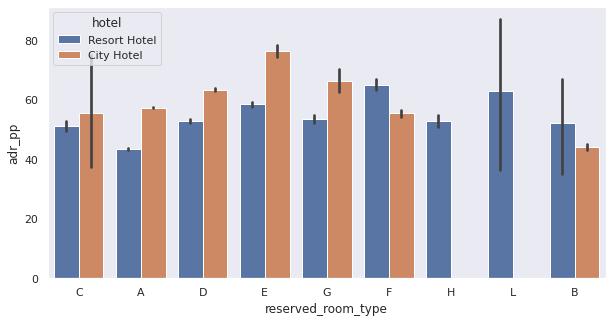

In [59]:
# plotting variation in adr with room type
sns.barplot(data = new_df, x = 'reserved_room_type', y = 'adr_pp', hue = 'hotel')

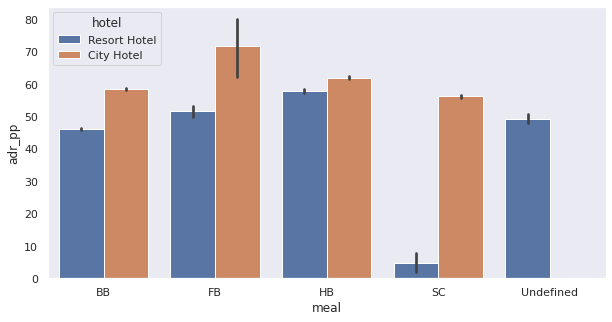

In [60]:
# plotting variation in adr with meal type
sns.barplot(data = new_df, x = 'meal', y = 'adr_pp', hue = 'hotel')

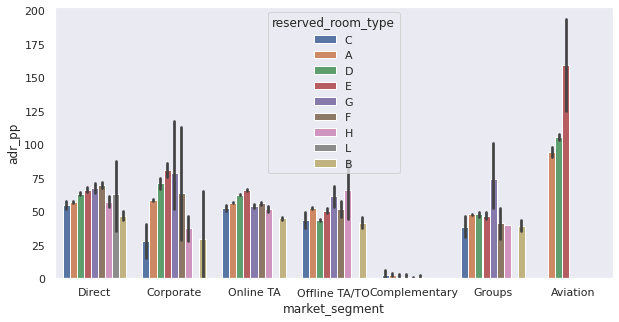

In [61]:
#plotting variation in adr by market segment
sns.barplot(x= 'market_segment', y= 'adr_pp', hue= 'reserved_room_type', data= new_df)

<h3>**Now lets find out, What is the optimal length of stay in order to get the best daily rate?**

In [62]:
# Creating a new column for total number of days stayed
new_df['Total_number_of_days_stayed']=new_df['stays_in_weekend_nights']+new_df['stays_in_week_nights']
new_df=new_df[new_df['Total_number_of_days_stayed']>0]


# Creating a new dataset by grouping total number of days stayed and average adr
optimal_adr = new_df.groupby(['hotel','Total_number_of_days_stayed']).adr.mean().reset_index().replace(to_replace=0, value=new_df['adr'].median())


#Finding correlation between Total number of days stayed and average daily rate
optimal_adr.corr()

,Total_number_of_days_stayed,adr
Total_number_of_days_stayed,1.00000,-0.44207
adr,-0.44207,1.00000


Text(0, 0.5, 'Average Daily Rate')

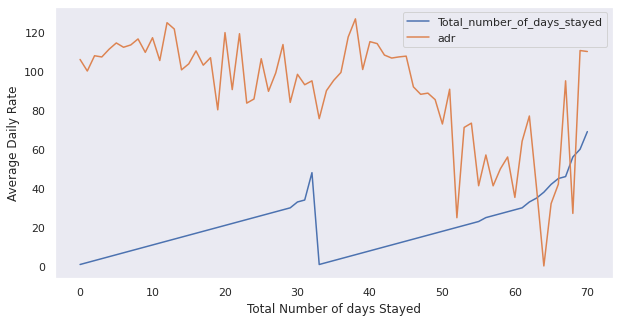

In [63]:
#Craetin a line plot to find relationship between these two
optimal_adr.plot()
plt.xlabel('Total Number of days Stayed')
plt.ylabel('Average Daily Rate')

**Conclusion:We can see that there is fairly negative correlation between these two. Implying that longer you stay, less your adr will be.

It is evident that as total number of days stayed goes up, adr goes down, so any stay between 50 to around 65 days would be optimal if looked at combined hotel data of both types**

Text(0, 0.5, 'Average Daily Rate')

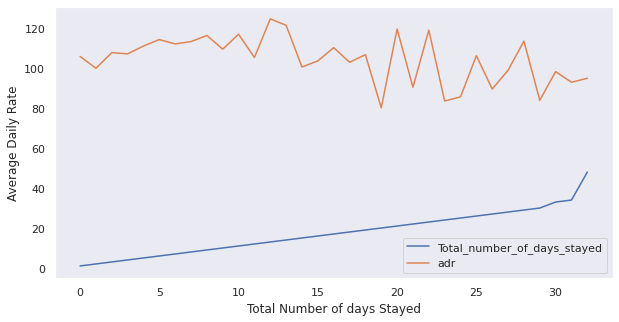

In [64]:
#Finding relationship between adr and total number of days in city hotels.
optimal_adr[optimal_adr['hotel']=="City Hotel"].plot()
plt.xlabel('Total Number of days Stayed')
plt.ylabel('Average Daily Rate')

**Well, it seems like for city hotels adr stays least affected by total number of days stayed, however any stay between 18-20 days might be optimal.**

<h3>Finding relationship between adr and total number of days in resort hotels

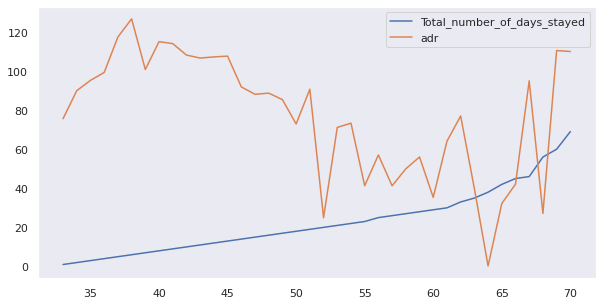

In [65]:
#Finding relationship between adr and total number of days in resort hotels.
optimal_adr[optimal_adr['hotel']=="Resort Hotel"].plot()

##### ***Yeah, so resort data was actually infulencing our overall correlation. Longer you stay in a resort, lesser adr will be experienced. Yet, any stay between 50-52 days and 62-64 days is optimal.***